<div style="width:100%;height:125px;text-align:center;border: 4px solid #C17C05;background-color:#C17C05;color:white">

<header style="width:100%;height:140px;">
  <h1>Chapter 6</h1>
    <h1><b>image classfication.part 2</b></h1>
</header>

<div> 

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    
 <a class="alert-link" href="https://www.youtube.com/watch?v=u8xn393mDPM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26&frags=wn "> https://www.youtube.com/watch?v=u8xn393mDPM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26&frags=wn </a><br>

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class07_cnn.ipynb<br>

</div>

# Convolutional Neural Networks (CNNs)

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima (1980) introduced the original concept of a convolutional neural network, and LeCun, Bottou, Bengio & Haffner (1998) greatly improved this work. From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture. This class follows the LeNet-5 style of convolutional neural network.

<b>A LeNET-5 Network (LeCun, 1998)</b><br>
<img src="https://camo.githubusercontent.com/8256ccc690eadb9eef83aa1658dff5b13cff1f9b/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f385f6c656e6574352e706e67">

So far we have only seen one layer type (dense layers). By the end of this course we will have seen:<br>
1. <b>Dense Layers</b> - Fully connected layers. (introduced previously)
2. <b>Convolution Layers</b> - Used to scan across images. (introduced this class)
3. <b>Max Pooling Layers</b> - Used to downsample images. (introduced this class)
4. <b>Dropout Layer </b>- Used to add regularization. (introduced next class)

### <b>Convolution Layers</b>

## Convolution Layers

The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

* Number of filters
* Filter Size
* Stride
* Padding
* Activation Function/Non-Linearity

The primary purpose for a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters that we give to a convolutional layer, the more features it can detect.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each row of the image. There is also a hyper parameter that specifies both the width and height of the square-shaped filter. Figure 10.1 shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

```
[FilterSize] * [FilterSize] * [# of Filters]
```

For example, if the filter size were 5 (5x4) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer’s output or image grid. Figure 10.2 illustrates the sweep:

![CNN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_cnn_grid.png "CNN")

The above figure shows a convolutional filter with a size of 4 and a padding size of 1. The padding size is responsible for the boarder of zeros in the area that the filter sweeps. Even though the image is actually 8x7, the extra padding provides a virtual image size of 9x8 for the filter to sweep across. The stride specifies the number of positions at which the convolutional filters will stop. The convolutional filters move to the right, advancing by the number of cells specified in the stride. Once the far right is reached, the convolutional filter moves back to the far left, then it moves down by the stride amount and
continues to the right again.

Some constraints exist in relation to the size of the stride. Obviously, the stride cannot be 0. The convolutional filter would never move if the stride were set to 0. Furthermore, neither the stride, nor the convolutional filter size can be larger than the previous grid. There are additional constraints on the stride (s), padding (p) and the filter width (f) for an image of width (w). Specifically, the convolutional filter must be able to start at the far left or top boarder, move a certain number of strides, and land on the far right or bottom boarder. The following equation shows the number of steps a convolutional operator
must take to cross the image:

$ steps = \frac{w - f + 2p}{s+1} $

The number of steps must be an integer. In other words, it cannot have decimal places. The purpose of the padding (p) is to be adjusted to make this equation become an integer value.

## Max Pooling Layers

Max-pool layers downsample a 3D box to a new one with smaller dimensions. Typically, you can always place a max-pool layer immediately following convolutional layer. The LENET shows the max-pool layer immediately after layers C1 and C3. These max-pool layers progressively decrease the size of the dimensions of the 3D boxes passing through them. This technique can avoid overfitting (Krizhevsky, Sutskever & Hinton, 2012).

A pooling layer has the following hyper-parameters:

* Spatial Extent (f )
* Stride (s)

Unlike convolutional layers, max-pool layers do not use padding. Additionally, max-pool layers have no weights, so training does not affect them. These layers simply downsample their 3D box input. The 3D box output by a max-pool layer will have a width equal to this equation:

$ w_2 = \frac{w_1 - f}{s + 1} $

The height of the 3D box produced by the max-pool layer is calculated similarly with this equation:

$ h_2 = \frac{h_1 - f}{s + 1} $

The depth of the 3D box produced by the max-pool layer is equal to the depth the 3D box received as input. The most common setting for the hyper-parameters of a max-pool layer are f =2 and s=2. The spatial extent (f) specifies that boxes of 2x2 will be scaled down to single pixels. Of these four pixels, the pixel with the maximum value will represent the 2x2 pixel in the new grid. Because squares of size 4 are replaced with size 1, 75% of the pixel information is lost. The following figure shows this transformation as a 6x6 grid becomes a 3x3:

![MaxPool](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_conv_maxpool.png "MaxPool")

Of course, the above diagram shows each pixel as a single number. A grayscale image would have this characteristic. For an RGB image, we usually take the average of the three numbers to determine which pixel has the maximum value.

[More information on CNN's](http://cs231n.github.io/convolutional-networks/)

# TensorFlow with CNNs

The following sections describe how to use TensorFlow/Keras with CNNs.




# Computer Vision

This class will focus on computer vision. There are some important differences and similarities with previous neural networks.
- We will usually use classification, though regression is still an option.
- The input to the neural network is now 3D (height, width, color)
- Data are not transformed, no z-scores or dummy variables.
- Processing time is much longer.
- We now have different layer times: dense layers (just like before), convolution layers and max pooling layers.

# MNIST Digits Data Set

http://yann.lecun.com/exdb/mnist/

<img src="https://camo.githubusercontent.com/5f28aeba89356f500f16b898d3619a1164f1f953/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f385f6d6e6973742e706e67">

This data set was generated from scanned forms.
<br><img src="https://camo.githubusercontent.com/a4b48ab5681b873129e9acbc6ed6eec303e99879/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f385f6578616d2e706e67">

# CIFAR Data Set

The CIFAR-10 data set contains low-rez images that are divided into 10 classes. The CIFAR-100 data set contains 100 classes in a hierarchy.

https://www.cs.toronto.edu/~kriz/cifar.html

<img src="https://camo.githubusercontent.com/8237f16a3441d968f2bcfc9aa540e361c1fa6640/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f385f63696661722e706e67">

# Convolutional Neural Networks (CNNs)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta


from tensorflow.keras.utils import to_categorical

import numpy as np

In [2]:
def CNN_next(input_shape,name_classses):
    
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding='same',input_shape=input_shape))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(name_classses,activation='softmax'))
    
    model.compile(optimizer=Adadelta(),loss=categorical_crossentropy,metrics=['accuracy'])
    
    
    return model

# DATA

In [3]:
# Load Data
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(f"""Train:\tX shape:{x_train.shape}\tY shape:{y_train.shape}\tType (X, y): 
({x_train.dtype}, {y_train.dtype})\tX values (max, min): ({x_train.min()}, {x_train.max()})""")
print(f"""Test:\tX shape:{x_test.shape}\tY shape:{y_test.shape}\tType (X, y): 
({x_test.dtype}, {y_test.dtype})\tX values (max, min): ({x_test.min()}, {x_test.max()})""")

Train:	X shape:(60000, 28, 28)	Y shape:(60000,)	Type (X, y): 
(uint8, uint8)	X values (max, min): (0, 255)
Test:	X shape:(10000, 28, 28)	Y shape:(10000,)	Type (X, y): 
(uint8, uint8)	X values (max, min): (0, 255)


In [6]:
# change the shape:
import numpy as np
x_train = np.expand_dims(x_train,axis=3)
x_test = np.expand_dims(x_test,axis=3)

In [7]:
print(f"""Train:\tX shape:{x_train.shape}\tY shape:{y_train.shape}\tType (X, y): 
({x_train.dtype}, {y_train.dtype})\tX values (max, min): ({x_train.min()}, {x_train.max()})""")
print(f"""Test:\tX shape:{x_test.shape}\tY shape:{y_test.shape}\tType (X, y): 
({x_test.dtype}, {y_test.dtype})\tX values (max, min): ({x_test.min()}, {x_test.max()})""")

Train:	X shape:(60000, 28, 28, 1)	Y shape:(60000,)	Type (X, y): 
(uint8, uint8)	X values (max, min): (0, 255)
Test:	X shape:(10000, 28, 28, 1)	Y shape:(10000,)	Type (X, y): 
(uint8, uint8)	X values (max, min): (0, 255)


In [8]:
# Part2: make float number:
# normalise x_train and x_train:    
x_train, x_test = x_train.astype('float') / 255, x_test.astype('float') / 255


# Converts a class vector (integers) to binary class matrix.
numclass = 10
y_train_onehot, y_test_onehot = to_categorical(y_train,numclass), to_categorical(y_test,numclass)

In [9]:
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


## Training/Fitting CNN

The following code will train the CNN for 20,000 steps. This can take awhile, you might want to scale the step count back. GPU training can help. My results:
- CPU Training Time: Elapsed time: 1:50:13.10
- GPU Training Time: Elapsed time: 0:13:43.06

In [10]:
from pendulum import now
from farhad_DL.utils import TimeSummary, plot_training_summary

Using TensorFlow backend.


In [11]:
numclass = 10

In [12]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [16]:
start = now()
time_summary = TimeSummary()
num_classes = 10
model = CNN_next(input_shape,numclass)
summary = model.fit(x_train,y_train_onehot,
          verbose=0,
          callbacks=[time_summary],
          batch_size=128, 
          epochs=10,
          validation_data=(x_test,y_test_onehot))

score = model.evaluate(x_test,y_test_onehot)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

estimate_time = now() - start
print("Elapsed time: {}".format(estimate_time))

10000/10000 [==============================] - 7s 705us/step
Test loss: 0.0315688502300065
Test accuracy: 0.9904
Elapsed time: <Period [2019-01-15T11:33:36.102103+00:00 -> 2019-01-15T12:12:20.045696+00:00]>


Training time: 1:36:49.298501(HH:MM:SS)
Epoch time avg: 0:09:40.929727(HH:MM:SS)


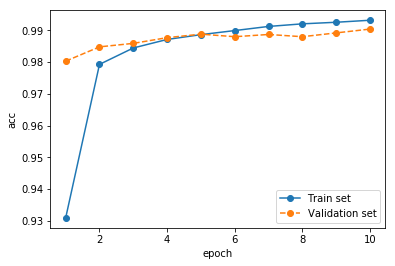

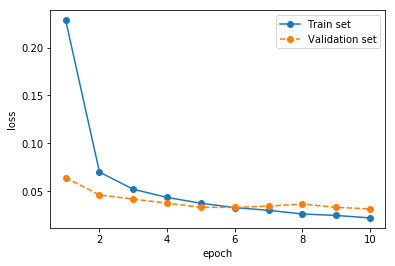

In [17]:
plot_training_summary(summary, time_summary)

<h3>Note:</h3>
GPUs are most often used for training rather than prediction. <br>
if you are using a GPU you might get the ResourceExhaustedError. This occurs because the GPU might not have enough ram to predict the entire data set at once.

# Other Resources

## <b>1</b>
[Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)<br>
This challenge evaluates algorithms for object detection and image classification at large scale. This year there will be two competitions:<br>
A PASCAL-style detection challenge on fully labeled data for 200 categories of objects, and
An image classification plus object localization challenge with 1000 categories.
NEW: This year all participants are encouraged to submit object localization results; in past challenges, submissions to classification and classification with localization tasks were accepted separately.<br>
One high level motivation is to allow researchers to compare progress in detection across a wider variety of objects -- taking advantage of the quite expensive labeling effort. Another motivation is to measure the progress of computer vision for large scale image indexing for retrieval and annotation.

## <b>2</b>
[Andrej Karpathy](https://cs.stanford.edu/people/karpathy/)
<br>
Timeline. 
2016-now: Research Scientist at OpenAI Deep Learning, Generative Models, Reinforcement Learning 

Summer 2015: DeepMind Internship Deep Reinforcement Learning group 

Summer 2013: Google Research Internship Large-Scale Supervised Deep Learning for Videos 

2011-2015: Stanford Computer Science Ph.D. student Deep Learning, Computer Vision, Natural Language Processing. Adviser: Fei-Fei Li. 

Summer 2011: Google Research Internship Large-Scale Unsupervised Deep Learning for Videos 

2009-2011: University of British Columbia: MSc Learning Controllers for Physically-simulated Figures. Adviser: Michiel van de Panne 

2005-2009: University of Toronto: BSc Double major in Computer Science and Physics 

June 2017: I joined Tesla as the Director of AI. (TechCrunch article) 

Feb 2017: Joined the steering committee of distill.pub! 

Jan 2017: Chatted with Nathan Benaich at REWORK. (video) 

Dec 2016: Started a Medium blog for smaller/shorter blog posts, in addition to my usual one.

## <b>3</b>
[CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu)<br>
[CS231n - GitHub](http://cs231n.github.io/)<br>
Stanford course on computer vision/CNN's.

## <b>4:</b>
[ConvNetJS](https://cs.stanford.edu/people/karpathy/convnetjs/)<br>
The library allows you to formulate and solve Neural Networks in Javascript, and was originally written by @karpathy (I am a PhD student at Stanford). However, the library has since been extended by contributions from the community and more are warmly welcome. Current support includes:

Common Neural Network modules (fully connected layers, non-linearities)
Classification (SVM/Softmax) and Regression (L2) cost functions
Ability to specify and train Convolutional Networks that process images
An experimental Reinforcement Learning module, based on Deep Q Learning.
Head over to Getting Started for a tutorial that lets you get up and running quickly, and discuss Documentation for all specifics.

# Latest Advances in CNN's

He, K., Zhang, X., Ren, S., & Sun, J. (2016). [Deep residual learning for image recognition](https://arxiv.org/abs/1512.03385). In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 770-778).
* [Caffee ResNet GitHub](https://github.com/KaimingHe/deep-residual-networks)


Geoffrey Hinton is suggesting that we might be [doing computer vision wrong](https://www.wired.com/story/googles-ai-wizard-unveils-a-new-twist-on-neural-networks/) and has introduced two new papers about an old technique called Capsule Neural Networks:
    
* Sabour, S., Frosst, N., & Hinton, G. E. (2017). [Dynamic Routing Between Capsules](https://arxiv.org/abs/1710.09829). arXiv preprint arXiv:1710.09829.
* [Matrix capsules with EM routing](https://openreview.net/forum?id=HJWLfGWRb&noteId=HJWLfGWRb) - ICLR 2018 Blind Submission



